# TD2: Data Analysis and Visualisation with Python

## Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Exercice 1

### Question 1

In [3]:
data = pd.read_csv("data/Stat_covid.csv")
data.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN


### Question 2

In [4]:
len(data)

5760

In [5]:
data.isna().sum()

country                   0
country_code              0
year_week                 0
level                     0
region                    0
region_name               0
new_cases               228
tests_done             1152
population                0
testing_rate           1152
positivity_rate        1174
testing_data_source    1152
dtype: int64

### Question 3

In [6]:
data.fillna(0, inplace=True)
data.isna().sum()

country                0
country_code           0
year_week              0
level                  0
region                 0
region_name            0
new_cases              0
tests_done             0
population             0
testing_rate           0
positivity_rate        0
testing_data_source    0
dtype: int64

### Question 4

In [7]:
data['year'] = data['year_week'].str[0:4]
data['week'] = data['year_week'].str[6:].astype(int)

In [8]:
data[(data['year'] == '2022') & (data['country'].isin(['France', 'Germany', 'Spain', 'Italy']))].groupby('country')['new_cases'].mean().reset_index()

,country,new_cases
0,France,559769.846154
1,Germany,580207.000000
2,Italy,362890.576923
3,Spain,132235.942308


### Question 5

<Axes: title={'center': 'Total number of new cases by country'}, xlabel='country'>

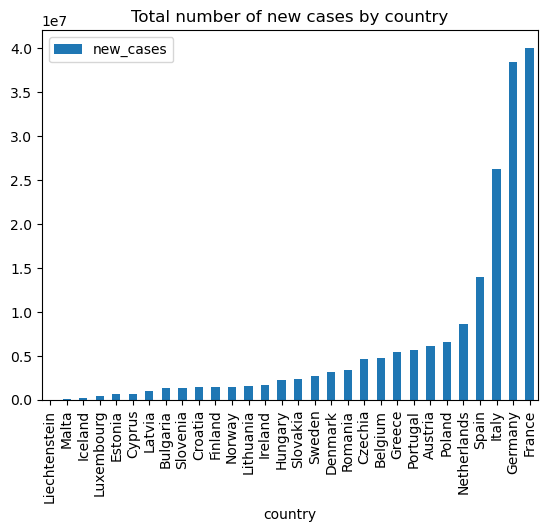

In [9]:
total_cases = data.groupby('country')['new_cases'].sum().reset_index().sort_values('new_cases')
total_cases.plot(title = 'Total number of new cases by country', x='country', y='new_cases', kind='bar')

### Question 6

<Axes: title={'center': 'Total number of new cases (<30 000 000) by country'}, xlabel='country'>

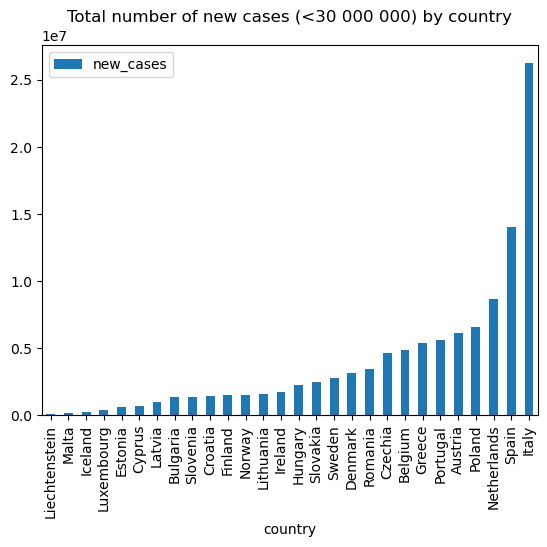

In [10]:
total_cases[total_cases['new_cases'] < 30000000].plot(title = 'Total number of new cases (<30 000 000) by country', x='country', y='new_cases', kind='bar')

### Question 7

In [11]:
from sklearn.cluster import KMeans

df = total_cases

X = df['new_cases'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

severity_map = {0: 'Medium', 1: 'Severe', 2: 'Mild'}
df['severity'] = df['cluster'].map(severity_map)
df.drop('cluster', axis=1, inplace=True)

/Users/alexandrecogordan/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: ylabel='count'>

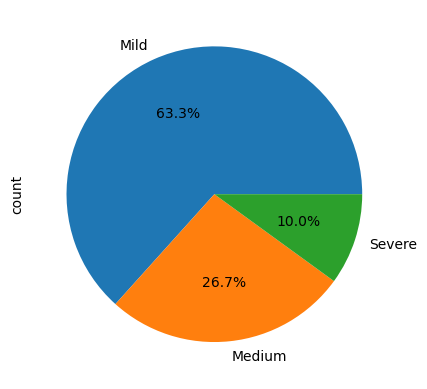

In [12]:
df['severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Question 8

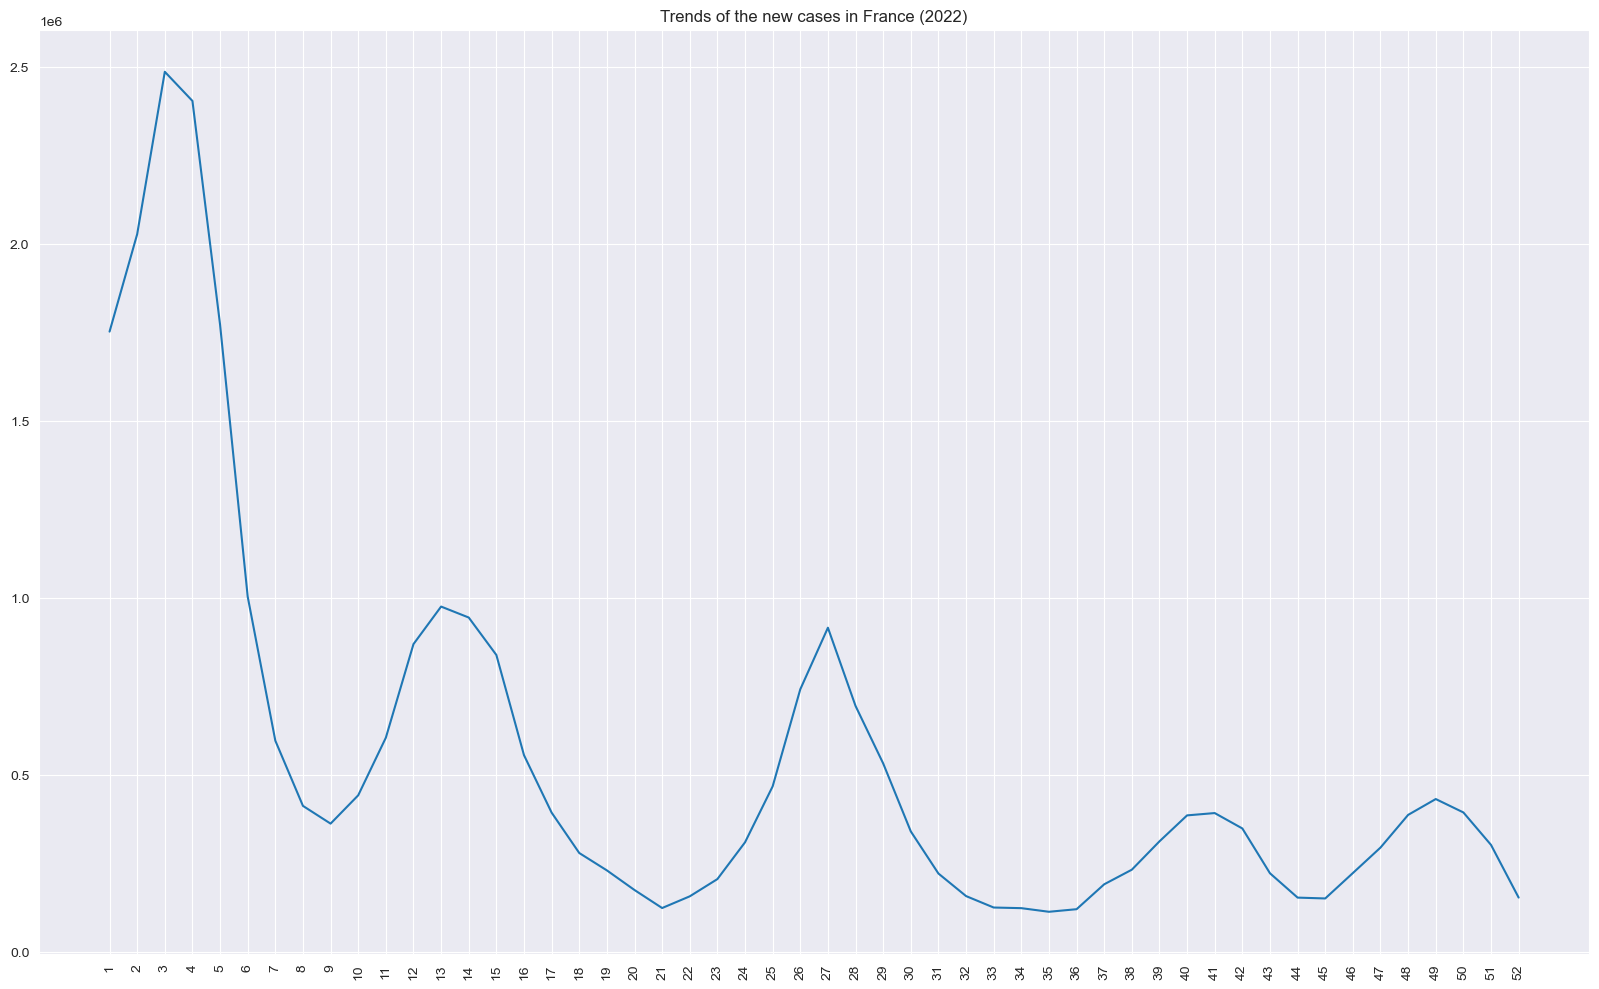

In [106]:
france_cases = data[(data['country'] == 'France') & (data['year'] == '2022')]

x = france_cases['week']
y = france_cases['new_cases']

fig = plt.figure(figsize=(20, 12))

plt.plot(x, y)
plt.xticks(x, rotation=90)
plt.title('Trends of the new cases in France (2022)')

plt.grid(True)  # Add grid

plt.show()

### Question 9

In [14]:
temp = data.groupby('country')['population'].unique().astype(int).reset_index().sort_values('population')
merged_df = pd.merge(df, temp[['country', 'population']], on='country', how='left')

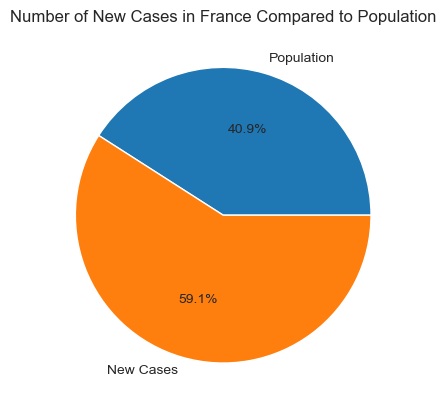

In [107]:
import matplotlib.pyplot as plt

new_cases = merged_df[merged_df['country'] == 'France']['new_cases'].values[0]
population = merged_df[merged_df['country'] == 'France']['population'].values[0] - new_cases

plt.pie([population, new_cases], labels=['Population', 'New Cases'], autopct='%1.1f%%')

plt.title('Number of New Cases in France Compared to Population')

plt.show()

# Bear in mind we subtracted the new cases from the population so that the we show the proportion of the population that is not infected (in this case 40.9%)

### Question 10 - FINIR CA (by week?)

In [16]:
fig = go.Figure()

new_france_cases =  data[(data['country'] == 'France')]

for year in data['year'].unique():
    fig.add_trace(go.Violin(x=new_france_cases['year'][new_france_cases['year'] == year],
                            y=new_france_cases['new_cases'][new_france_cases['year'] == year],
                            name=year,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(height=800, width=1500)

fig.show()

## Exercice 2

### Question 1

In [17]:
employee_df = pd.read_csv("data/employees.csv")

In [18]:
employee_df.isnull().sum()

First Name             0
Last Name              0
Email                  0
Phone                  0
Gender                 0
Age                    0
Job Title              0
Years Of Experience    0
Salary                 0
Department             0
dtype: int64

### Question 2

In [34]:
sns.set_style('darkgrid')

### Question 3

In [35]:
employee_df.head()

,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
0,Jose,Lopez,joselopez0944@slingacademy.com,+1-971-533-4552x1542,male,25,Project Manager,1,8500,Product
1,Diane,Carter,dianecarter1228@slingacademy.com,881.633.0107,female,26,Machine Learning Engineer,2,7000,Product
2,Shawn,Foster,shawnfoster2695@slingacademy.com,001-966-861-0065x493,male,37,Project Manager,14,17000,Product
3,Brenda,Fisher,brendafisher3185@slingacademy.com,001-574-564-4648,female,31,Web Developer,8,10000,Product
4,Sean,Hunter,seanhunter4753@slingacademy.com,5838355842,male,35,Project Manager,11,14500,Product


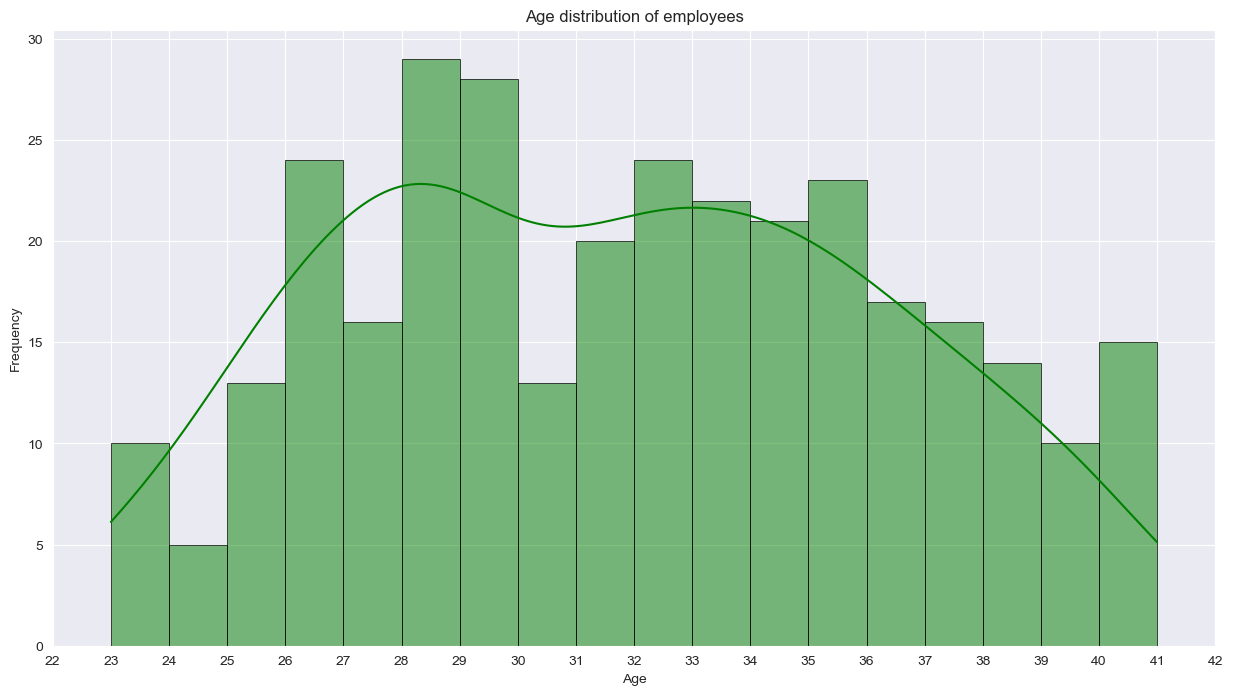

In [105]:
plt.figure(figsize=(15, 8))

sns.histplot(employee_df, x='Age', bins = 18, kde=True, edgecolor='black', linewidth=0.5, color='green')

plt.xticks(list(range(22, 43, 1)))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of employees')

plt.show()

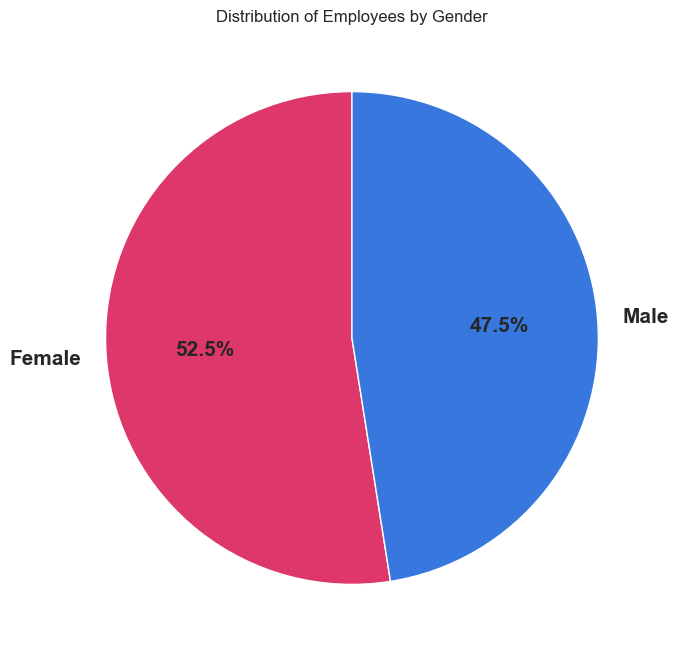

In [234]:
plt.figure(figsize=(15, 8))

employee_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], colors=['#de3769', '#3777de'], startangle=90, textprops={'fontsize': 15, 'fontweight': 'bold'}) 
plt.title('Distribution of Employees by Gender')
plt.ylabel('')

plt.show()

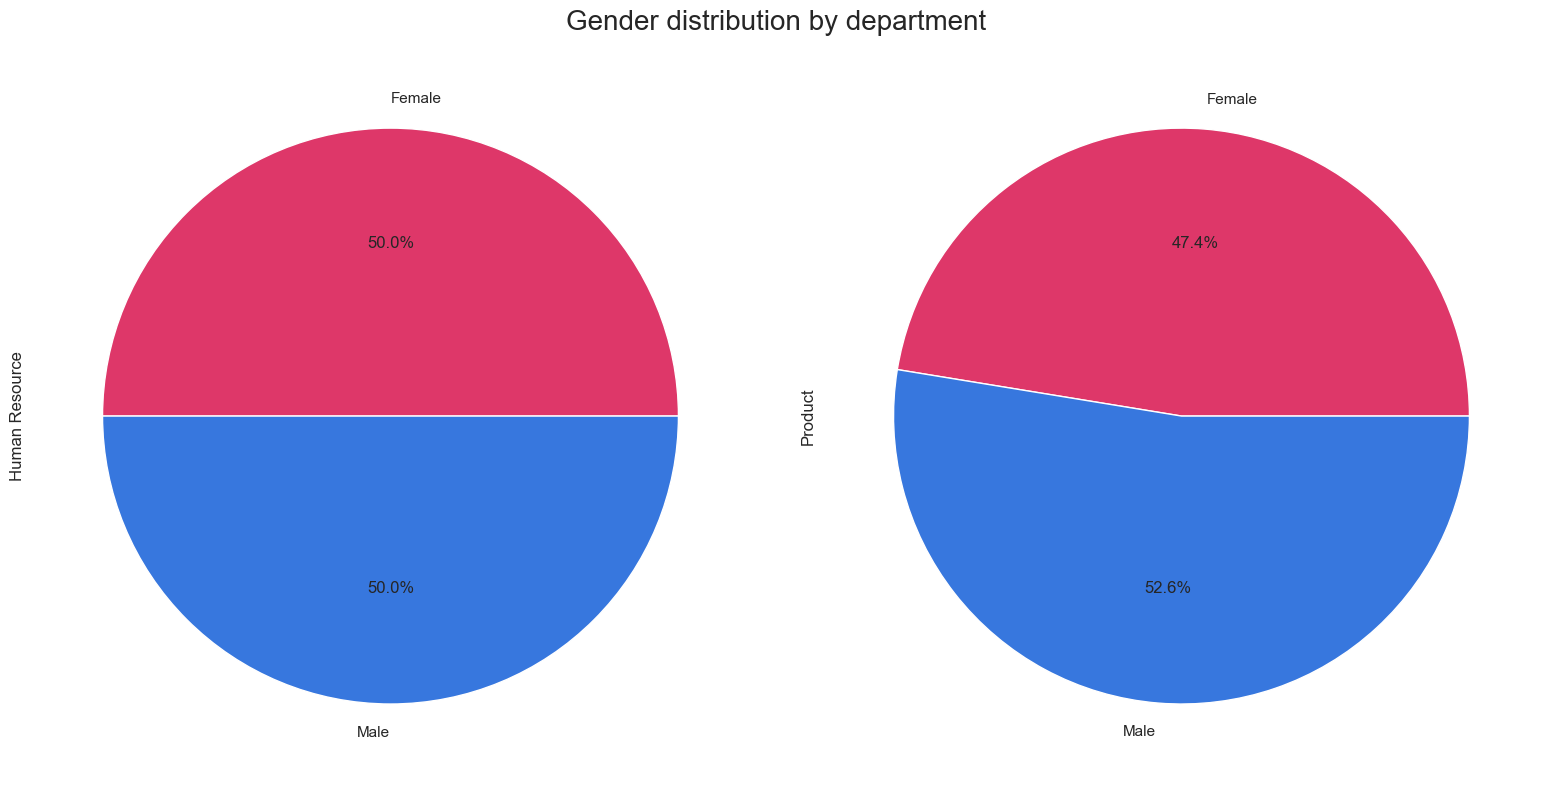

In [235]:
gender_by_dept = employee_df.pivot_table(index='Gender', columns='Department', aggfunc='size')

num_cols = min(len(gender_by_dept.columns), 3)
num_rows = (len(gender_by_dept.columns) - 1) // num_cols + 1

gender_by_dept.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], colors=['#de3769', '#3777de'], subplots=True, layout=(num_rows, num_cols), figsize=(16, 8), legend=False)

plt.suptitle('Gender distribution by department', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

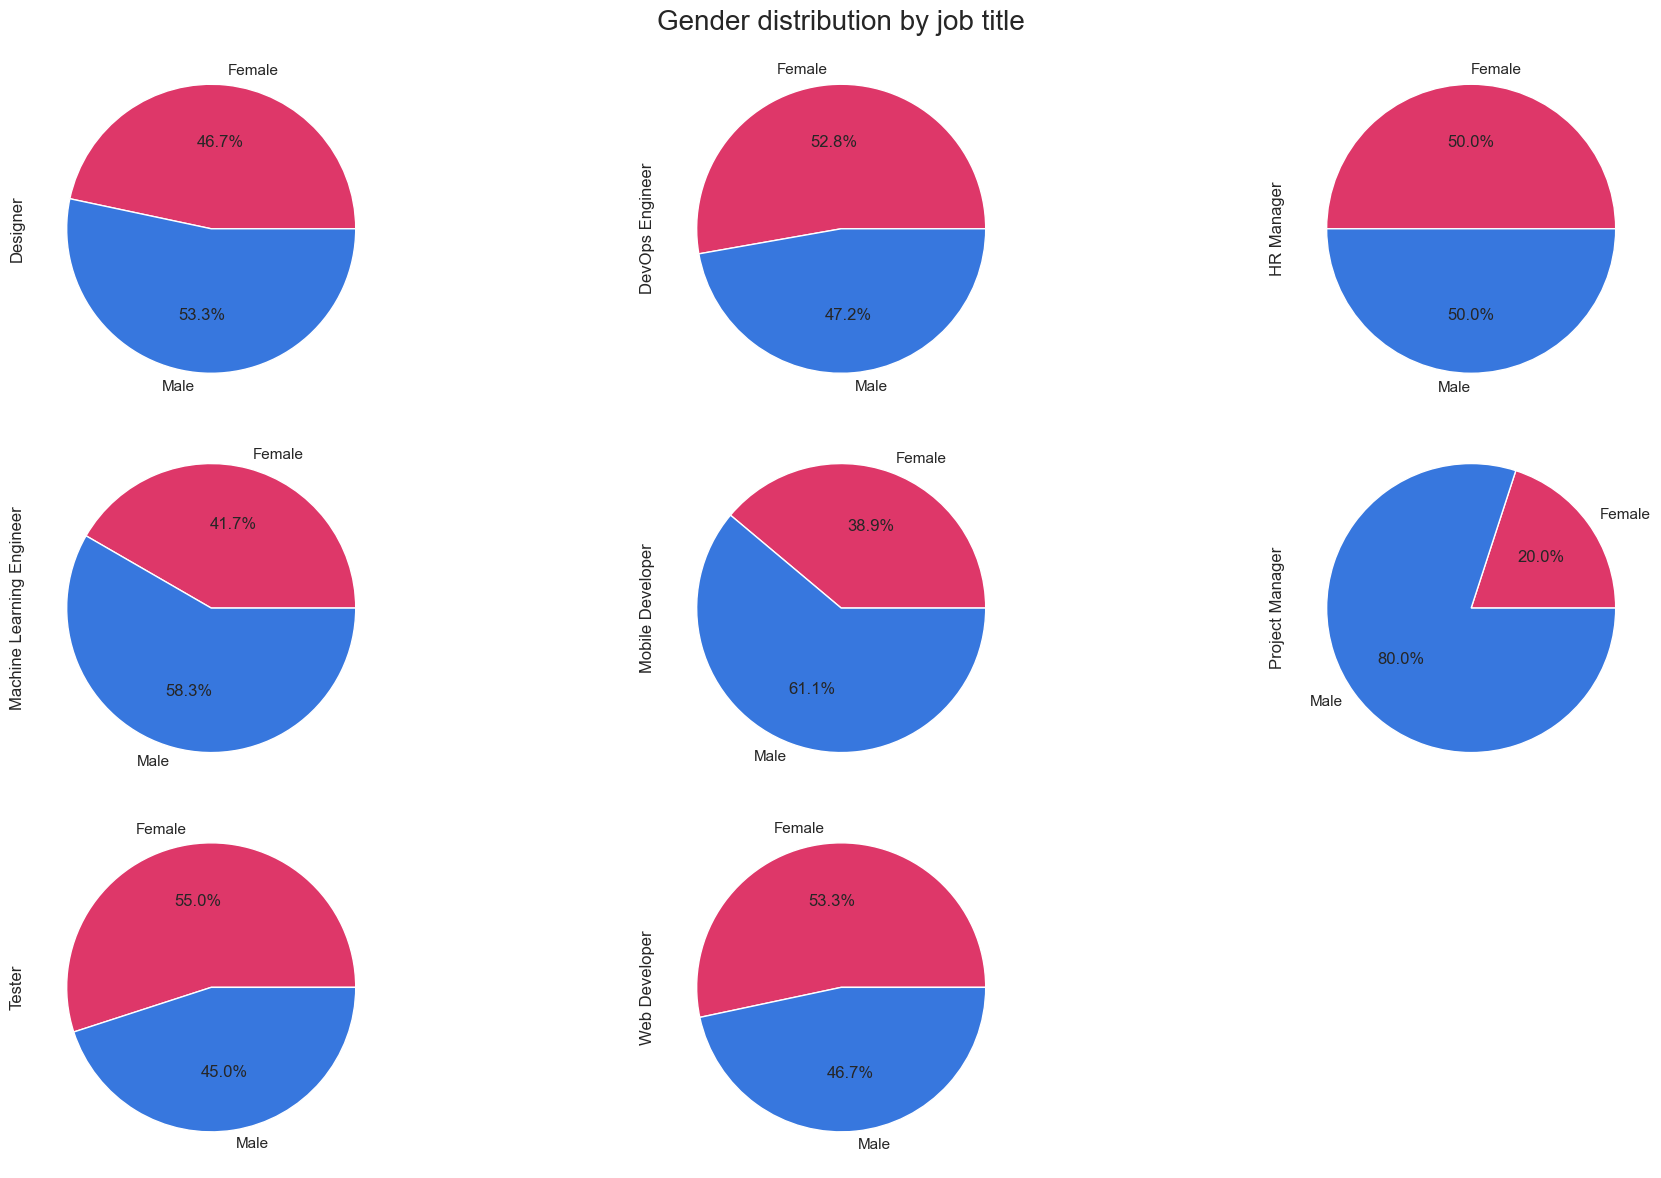

In [239]:
gender_by_job = employee_df.pivot_table(index='Gender', columns='Job Title', aggfunc='size')

num_cols = min(len(gender_by_job.columns), 3)
num_rows = (len(gender_by_job.columns) - 1) // num_cols + 1

gender_by_job.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], colors=['#de3769', '#3777de'], subplots=True, layout=(num_rows, num_cols), figsize=(20, 12), legend=False)

plt.suptitle('Gender distribution by job title', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### Question 4

In [257]:
mean_salary_by_gender = employee_df.groupby('Gender')['Salary'].mean().round(2)
mean_salary_by_gender.sort_values(ascending=False)

Gender
male      10327.38
female    10006.58
Name: Salary, dtype: float64

In [258]:
mean_salary_by_dept = employee_df.groupby('Department')['Salary'].mean().round(2)
mean_salary_by_dept.sort_values(ascending=False)

Department
Product           10185.48
Human Resource     9850.00
Name: Salary, dtype: float64

In [259]:
mean_salary_by_job = employee_df.groupby('Job Title')['Salary'].mean().round(2)
mean_salary_by_job.sort_values(ascending=False)

Job Title
DevOps Engineer              12611.11
Project Manager              12500.00
Tester                       10275.00
Designer                     10066.67
Machine Learning Engineer     9979.17
Web Developer                 9895.83
HR Manager                    9850.00
Mobile Developer              9527.78
Name: Salary, dtype: float64

### Question 5

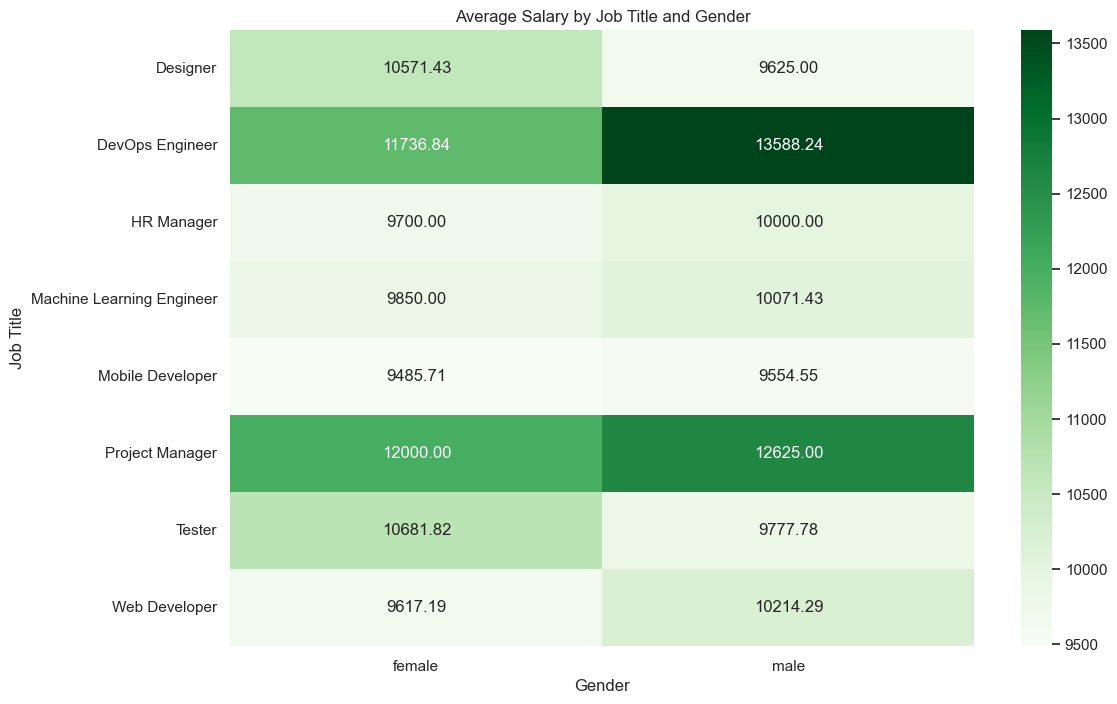

In [263]:
gender_salary_by_job = employee_df.pivot_table(values='Salary', columns='Gender', index='Job Title', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(gender_salary_by_job, annot=True, cmap='Greens', fmt='.2f')
plt.title('Average Salary by Job Title and Gender')
plt.xlabel('Gender')
plt.ylabel('Job Title')
plt.show()

### Question 6

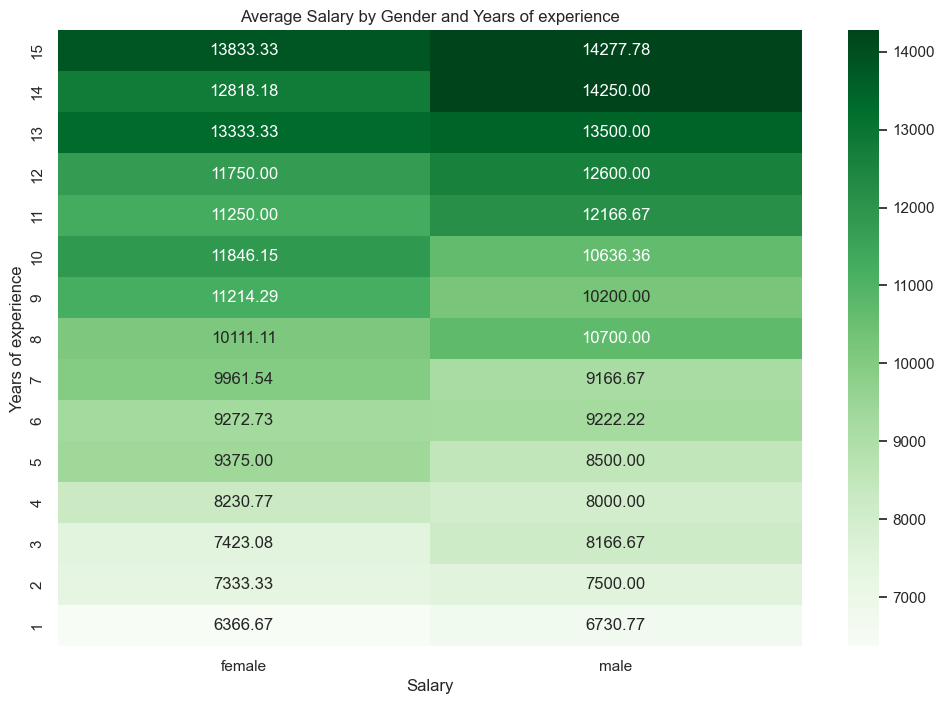

In [303]:
gender_salary_by_exp = employee_df.pivot_table(values='Salary', columns='Gender', index='Years Of Experience', aggfunc='mean').sort_values('Years Of Experience', ascending=False)

plt.figure(figsize=(12, 8))

sns.heatmap(gender_salary_by_exp, annot=True, cmap='Greens', fmt='.2f')

plt.title('Average Salary by Gender and Years of experience')
plt.xlabel('Salary')
plt.ylabel('Years of experience')
plt.show()

### Question 7

/var/folders/p9/flhwy6kx3s75yh91rftjm9dr0000gn/T/ipykernel_15027/2886845128.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




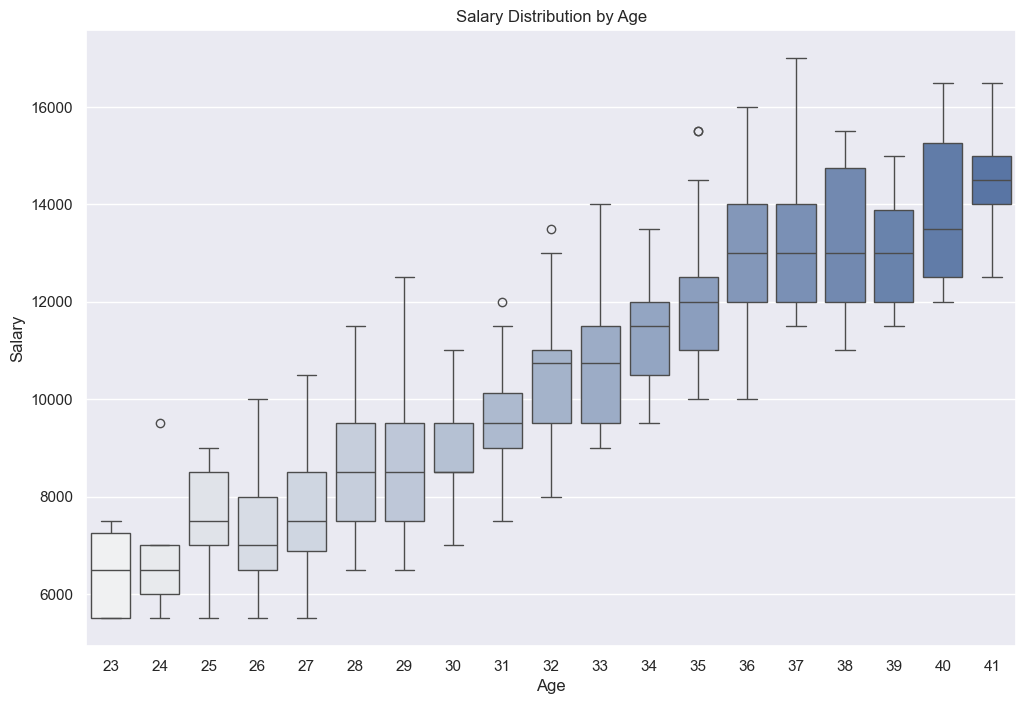

In [321]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=employee_df, x='Age', y='Salary', palette='light:b')

plt.title('Salary Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Question 8

In [335]:
fig = go.Figure()

for job in employee_df['Job Title'].unique():
    fig.add_trace(go.Violin(x=employee_df['Job Title'][employee_df['Job Title'] == job],
                            y=employee_df['Salary'][employee_df['Job Title'] == job],
                            name=job,
                            box_visible=True,
                            meanline_visible=True))

fig.update_layout(height=800, width=1500)

fig.show()

If we had used sns.violonplot, it would look like this

````sns.violinplot(data=employee_df, x='Salary', y="Job Title")````

### Question 9

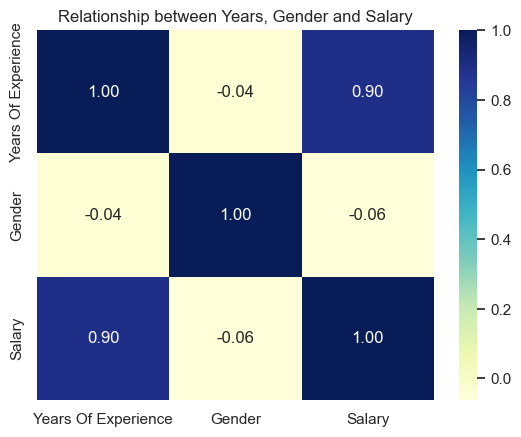

In [351]:
employee_df_relevant = employee_df[['Years Of Experience', 'Gender', 'Salary']]

employee_df_relevant.loc[:, 'Gender'] = employee_df_relevant['Gender'].map({'male': 0, 'female': 1})

sns.heatmap(employee_df_relevant.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

plt.title("Relationship between Years, Gender and Salary")

plt.show()

### Question 10

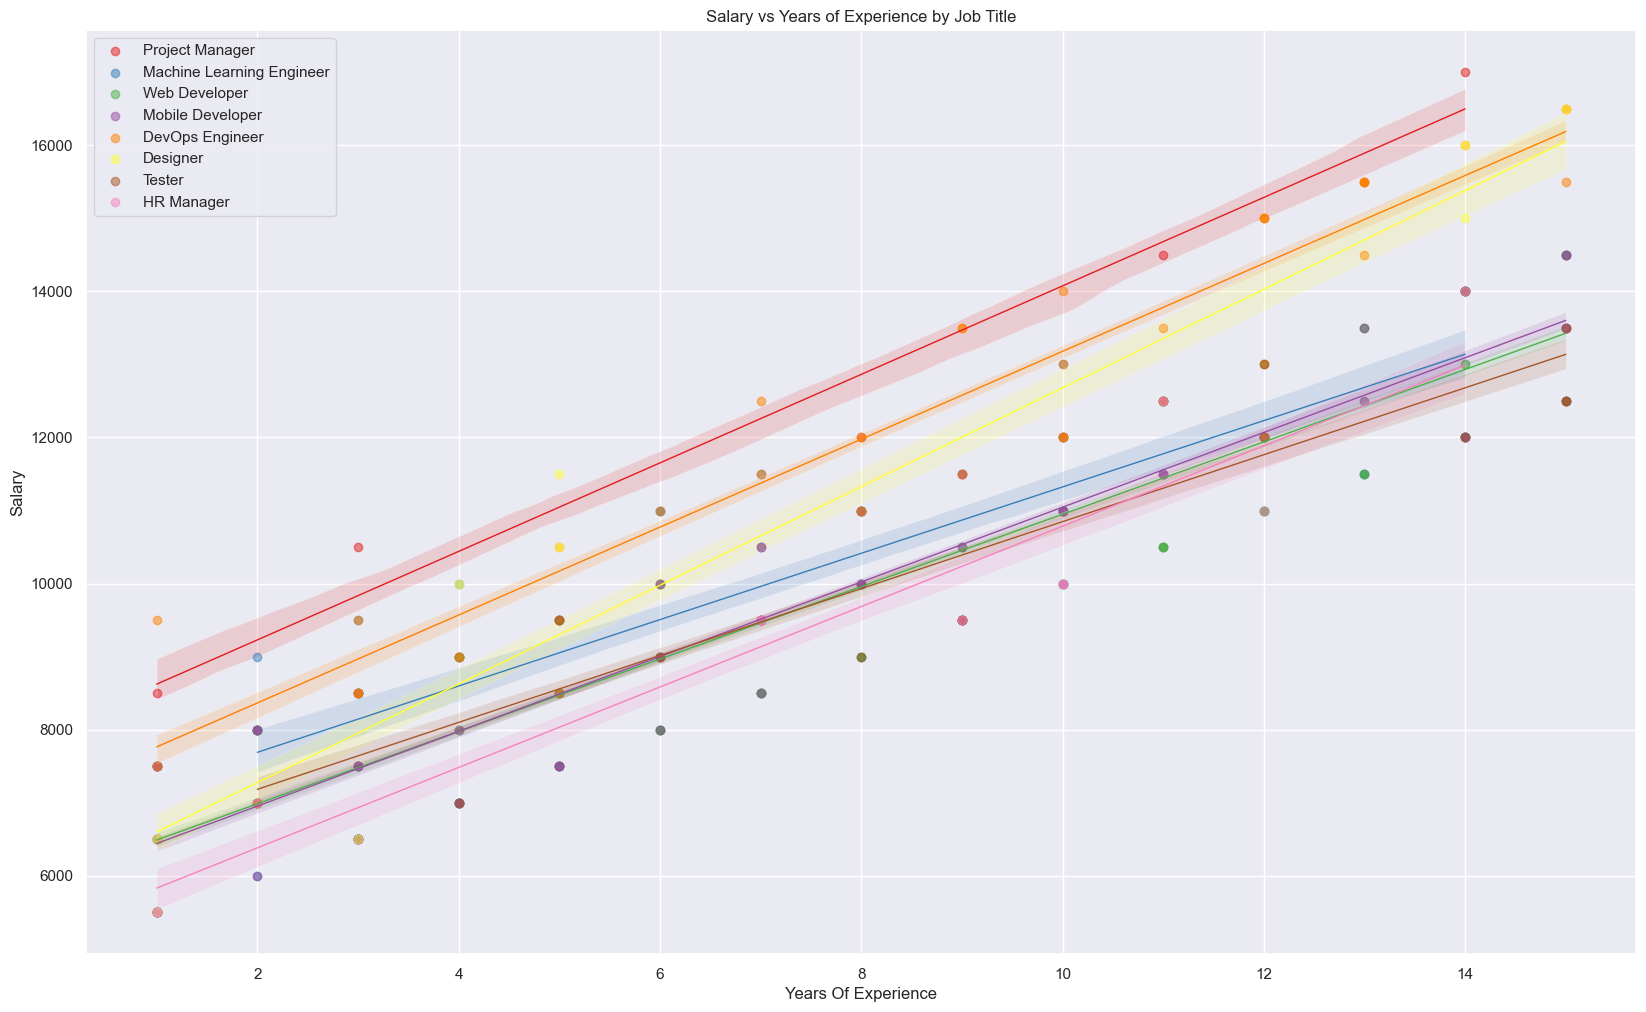

In [387]:
plt.figure(figsize=(20, 12))
sns.set_palette("Set1")

for job_type in employee_df['Job Title'].unique():
    sns.regplot(data=employee_df[employee_df['Job Title'] == job_type], x='Years Of Experience', y='Salary', label=job_type, scatter_kws={'alpha': 0.5}, line_kws={'lw': 1}, ci=50)

plt.title('Salary vs Years of Experience by Job Title')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


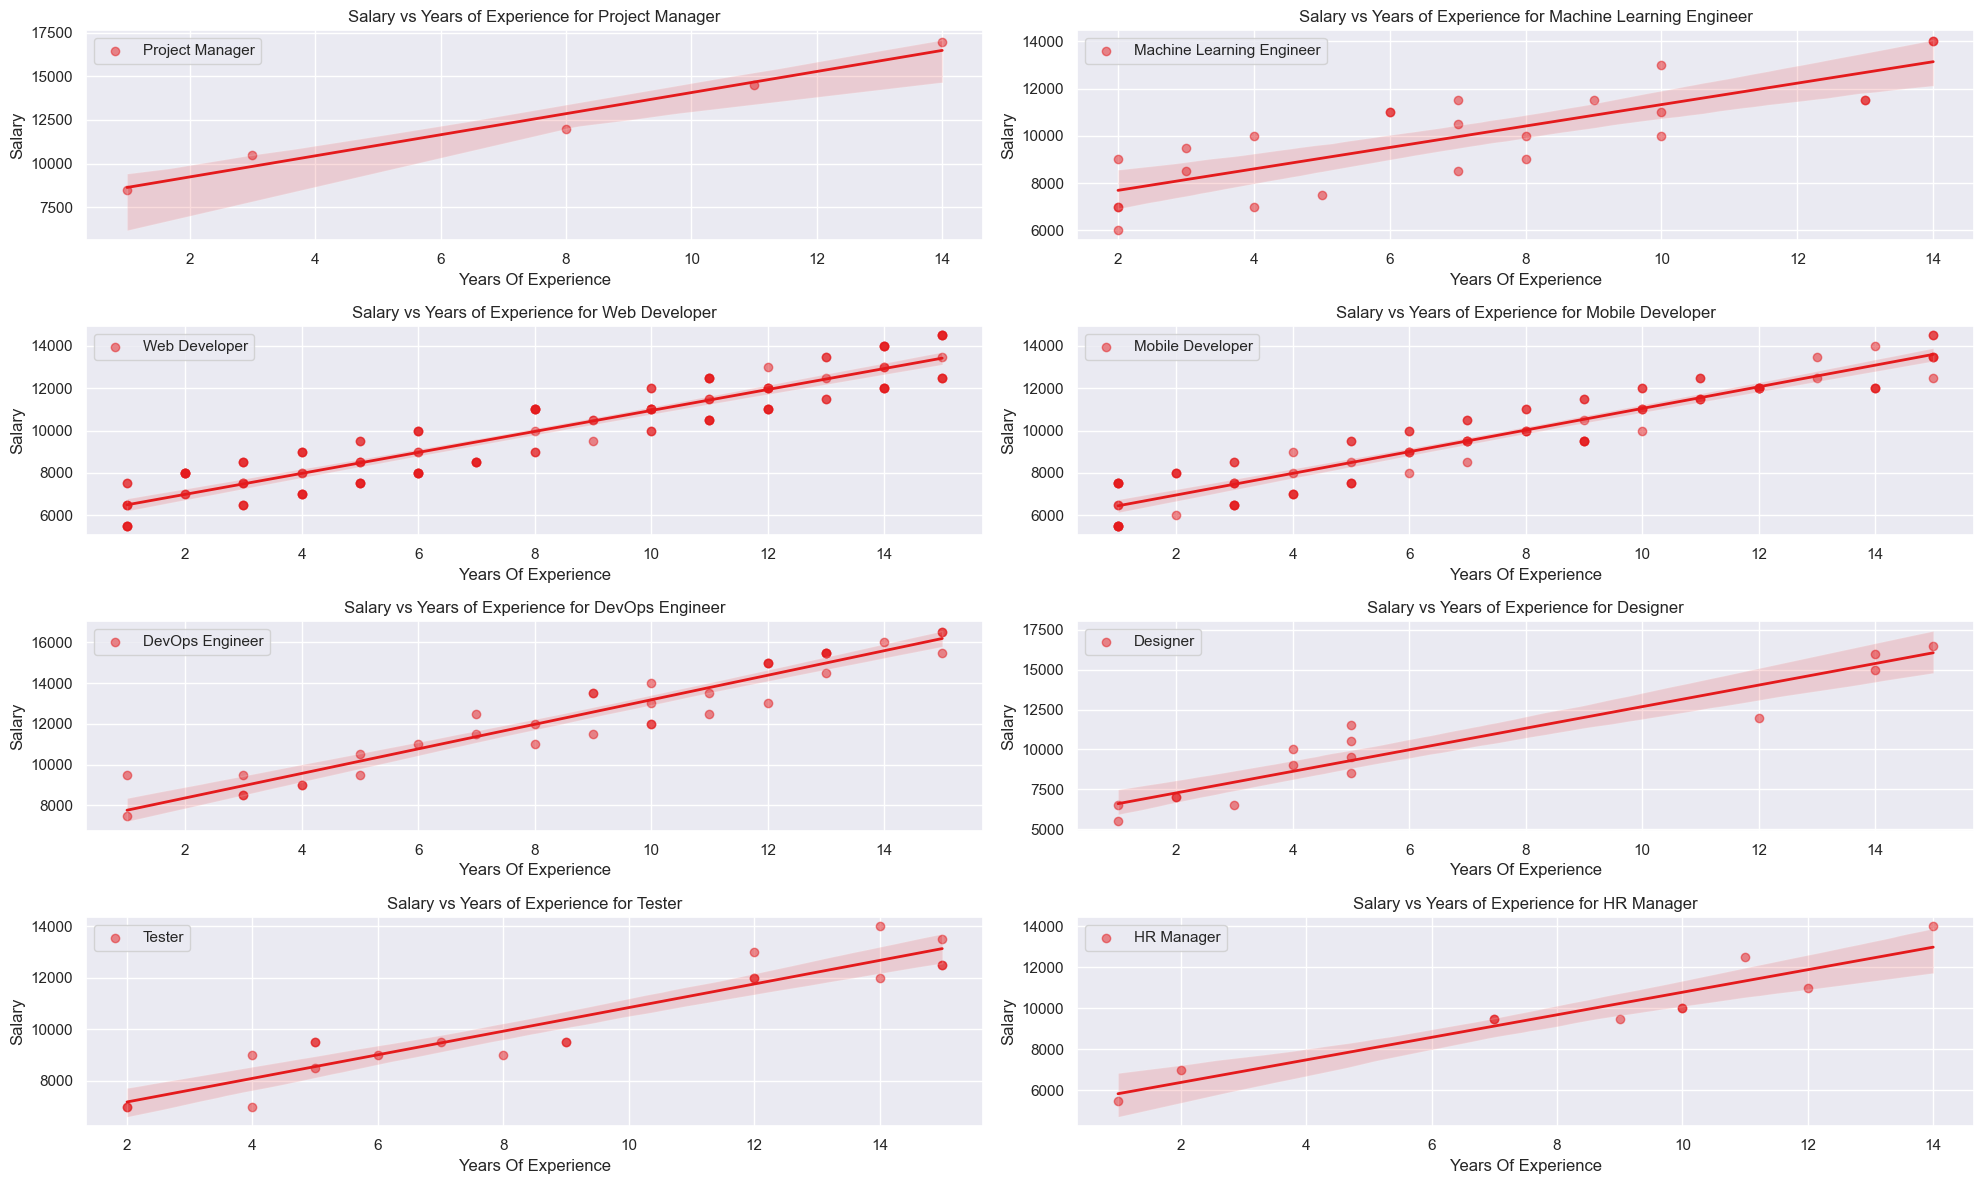

In [395]:
plt.figure(figsize=(20, 12))

job_titles = employee_df['Job Title'].unique()
num_plots = len(job_titles)
num_cols = 2
num_rows = (num_plots - 1) // num_cols + 1

for i, job_type in enumerate(job_titles):
    plt.subplot(num_rows, num_cols, i+1)
    sns.regplot(data=employee_df[employee_df['Job Title'] == job_type], x='Years Of Experience', y='Salary', label=job_type, scatter_kws={'alpha': 0.5}, line_kws={'lw': 2})
    
    plt.title(f'Salary vs Years of Experience for {job_type}')
    plt.xlabel('Years Of Experience')
    plt.ylabel('Salary')
    plt.legend()

plt.tight_layout()
plt.show()

## Exercice 3

### Question 1

In [407]:
layoffs_df = pd.read_csv("data/layoffs.csv")
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,OpenSea,New York City,Crypto,NaN,0.5,2023-11-03,Series C,United States,427.0
1,Viasat,San Diego,Other,800.0,0.1,2023-11-02,Post-IPO,United States,366.0
2,OpenSpace,SF Bay Area,Construction,NaN,NaN,2023-11-02,Series D,United States,200.0
3,Orchard,New York City,Real Estate,NaN,NaN,2023-11-02,Series D,United States,472.0
4,Informatica,SF Bay Area,Data,545.0,0.1,2023-11-01,Post-IPO,United States,NaN


In [408]:
layoffs_df.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1045
percentage_laid_off    1104
date                      0
stage                     7
country                   0
funds_raised            328
dtype: int64

In [409]:
layoffs_df.drop('funds_raised', axis = 1, inplace=True)
layoffs_df.dropna(inplace=True)

### Question 2

In [413]:
sns.set_style('whitegrid')

### Question 3

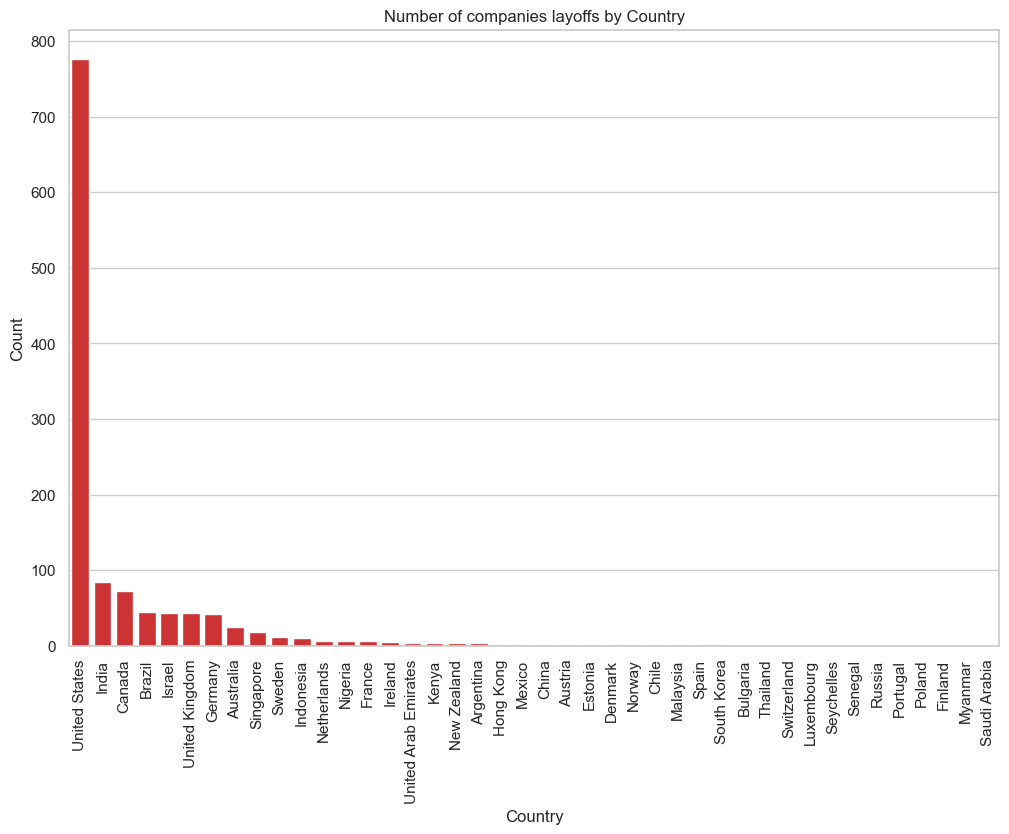

In [427]:
country_with_most_companies_layoffs = layoffs_df.groupby(['country', 'company'])['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)

plt.figure(figsize=(12, 8))

sns.countplot(data=country_with_most_companies_layoffs, x='country', order=country_with_most_companies_layoffs.groupby('country')['company'].count().sort_values(ascending=False).index)

plt.title('Number of companies layoffs by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

### Question 4

MAKE SURE TO ADD TITLES AND MARKINGS FOR EVERYTHING!